# **MOVIE REVIEWS TEXT CLASSIFICATION**

> **AIM**
> > Determining whether a movie review is positive or negative using Support Vector Machine & TFIDF Vectorizer

> > Use various metrics to verify the fit of the model

Importing the necessary libraries

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #to convert text into numerical data
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC #Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

*Pipeline* =>  Pipeline executes its defined steps in a strict, sequential order.The output of one step becomes the input for the next. 

*LinearSVC* => It is efficient, particularly for linearly separable data with a large number of samples. 

*SVM* => Classifies by finding an optimal hyperplane i.e a boundary that best separates data points into different classes

Importing the dataset

In [23]:
df = pd.read_csv('moviereviews2.tsv', sep='\t')
df

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...
...,...,...
5995,pos,"Of the three remakes of this plot, I like them..."
5996,neg,Poor Whoopi Goldberg. Imagine her at a friend'...
5997,neg,"Honestly before I watched this movie, I had he..."
5998,pos,This movie is essentially shot on a hand held ...


Data Preprocessing & Cleaning

In [24]:
#Top 5 records
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [25]:
#Bottom 5 records
df.tail()

,label,review
5995,pos,"Of the three remakes of this plot, I like them..."
5996,neg,Poor Whoopi Goldberg. Imagine her at a friend'...
5997,neg,"Honestly before I watched this movie, I had he..."
5998,pos,This movie is essentially shot on a hand held ...
5999,pos,It has singing. It has drama. It has comedy. I...


In [26]:
#Checking for the size of our data
df.shape

(6000, 2)

Checking for null values

In [27]:
df.isnull().sum()

label      0
review    20
dtype: int64

The dataset contains some null values in the ‘reviews’ column. Dropping them won’t significantly affect model performance

Dropping the null values -

In [28]:
#Dropping the null values
df.dropna(inplace=True) #inplace=True i.e making changes in the same dataframe

In [29]:
#Checking if any null values now
df.isnull().sum()

label     0
review    0
dtype: int64

There are no null values now.

But apart from having 'null' values, there can also be empty strings in the data. 

Checking & dropping the empty strings -

In [30]:
empty_string_idx = [] #list to store the index of the empty strings

for idx, lb, rv in df.itertuples(): 
    #idx=index, lb=labels, rv=reviews
    #iterating over the rows in dataframe
    if rv.isspace() or lb.isspace():
        empty_string_idx.append(idx)

In [31]:
empty_string_idx

[]

From the empty list we can conclude that the data doesn't contain empty strings

In [32]:
len(df)

5980

The data has 5980 records

Counting the number of values for each label

In [34]:
df['label'].value_counts()

label
pos    2990
neg    2990
Name: count, dtype: int64

# Training & Testing

The value to be predicted is the 'label' 

In [35]:
X = df['review']
y = df['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We give 30% of the data for testing

**Building a pipeline to vectorize the data & fit the data in our model i.e LinearSVC**

In [38]:
clf_model = Pipeline([('vectorizer',TfidfVectorizer()),('clf_model',LinearSVC())])

> Text is converted to numerical vectors

> Trains the linear support vector machine to classify the vectors into categories

# Training the Model

In [40]:
clf_model.fit(X_train, y_train)

,steps,"[('vectorizer', ...), ('clf_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


> Trained the model based on pipeline

> Converts X_train (input) into numerical vectors

# Predicting

In [46]:
predictions = clf_model.predict(X_test)

In [47]:
predictions

array(['neg', 'pos', 'pos', ..., 'neg', 'pos', 'neg'], dtype=object)

***Confusion Matrix***

In [51]:
cm = confusion_matrix(y_test, predictions)

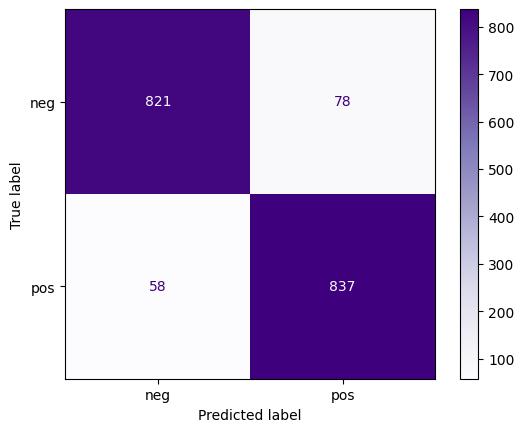

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
disp.plot(cmap='Purples')

***Accuracy Score***

In [61]:
print(accuracy_score(y_test, predictions))

0.9241917502787068


***Classification Report***

In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       899
         pos       0.91      0.94      0.92       895

    accuracy                           0.92      1794
   macro avg       0.92      0.92      0.92      1794
weighted avg       0.92      0.92      0.92      1794



We have excellent precision, recall and f1 scores for our prediction i.e the model is performing very well.

# Predicting on New Data

In [63]:
new_pred = clf_model.predict(["It's a cinematic triumph that combines stunning visuals with a deeply moving story and compelling performances, making it one of the standout films of the year. "])

In [64]:
new_pred

array(['pos'], dtype=object)

Thus, it correctly predicts whether a review is positive or negative

In [68]:
new_pred = clf_model.predict(["It's a good movie"])
new_pred

array(['pos'], dtype=object)

In [69]:
new_pred = clf_model.predict(["It's an average movie"])
new_pred

array(['pos'], dtype=object)

In [70]:
new_pred = clf_model.predict(["It's neither a good nor a bad movie"])
new_pred

array(['neg'], dtype=object)